In [1]:
#workingoin multi class dataset

In [2]:
import torch
from torch import nn
import numpy as np
import requests
from pathlib import Path 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from helper_functions import plot_predictions, plot_decision_boundary

In [3]:
#setting hyperparameter for working

In [4]:
NUM_CLASSES =4
NUM_FEATURES =2
RANDOM_SEED =42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob[:5], y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [5]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

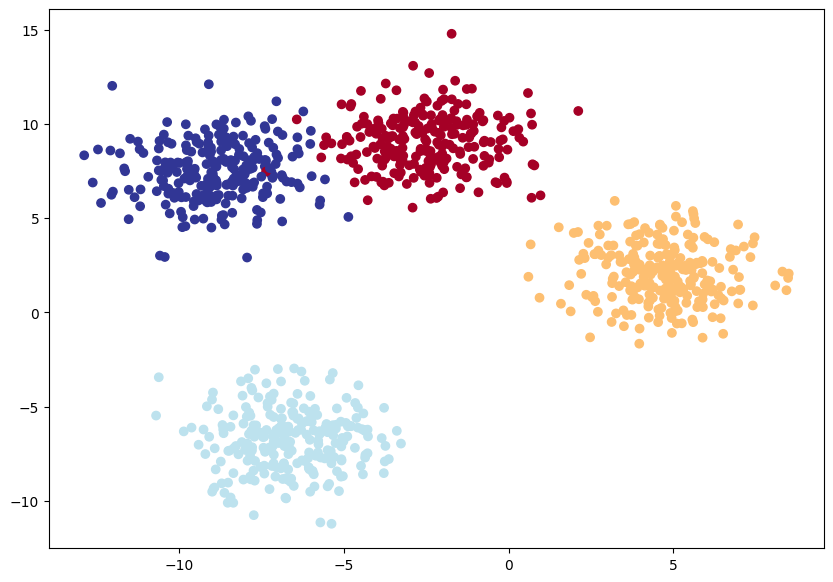

In [6]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [7]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=8),
            nn.Linear(in_features=8, out_features=8),
            nn.Linear(in_features=8, out_features=output_features))
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [8]:
Model_MR = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8)
Model_MR

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(Model_MR.parameters(), 
                            lr=0.1)

In [10]:
Model_MR.eval()
with torch.inference_mode():
    y_logits=Model_MR(X_blob_train)

In [11]:
y_logits[:10]

tensor([[ 0.7554,  0.8003,  0.1712,  0.4689],
        [-0.5527,  0.6442,  0.0947,  0.3700],
        [-0.7595, -2.3874, -0.5714, -0.2544],
        [-0.5603, -1.5100, -0.3741, -0.0666],
        [-0.5757,  0.2695,  0.0125,  0.2929],
        [-0.0078,  0.8424,  0.1555,  0.4381],
        [-0.8076,  0.5001,  0.0551,  0.3277],
        [ 0.6066,  0.5606,  0.1143,  0.4127],
        [-1.1303, -0.4752, -0.1676,  0.1136],
        [-0.6790,  0.3839,  0.0340,  0.3108]])

In [12]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [13]:
y_preds_probs=torch.softmax(y_logits, dim=1) #passing logit to softmax function
y_preds_probs[:10]

tensor([[0.2981, 0.3118, 0.1662, 0.2239],
        [0.1145, 0.3789, 0.2187, 0.2880],
        [0.2463, 0.0484, 0.2973, 0.4081],
        [0.2364, 0.0915, 0.2848, 0.3873],
        [0.1331, 0.3099, 0.2397, 0.3173],
        [0.1645, 0.3849, 0.1937, 0.2569],
        [0.0982, 0.3633, 0.2328, 0.3057],
        [0.2950, 0.2817, 0.1803, 0.2430],
        [0.1110, 0.2136, 0.2906, 0.3849],
        [0.1159, 0.3356, 0.2365, 0.3119]])

In [14]:
y_logits, y_preds_probs

(tensor([[ 0.7554,  0.8003,  0.1712,  0.4689],
         [-0.5527,  0.6442,  0.0947,  0.3700],
         [-0.7595, -2.3874, -0.5714, -0.2544],
         ...,
         [-0.4347,  0.7844,  0.1290,  0.4044],
         [-0.5816, -1.9378, -0.4678, -0.1543],
         [-1.2958, -0.7607, -0.2351,  0.0473]]),
 tensor([[0.2981, 0.3118, 0.1662, 0.2239],
         [0.1145, 0.3789, 0.2187, 0.2880],
         [0.2463, 0.0484, 0.2973, 0.4081],
         ...,
         [0.1183, 0.4002, 0.2078, 0.2737],
         [0.2557, 0.0659, 0.2865, 0.3920],
         [0.1061, 0.1811, 0.3064, 0.4064]]))

In [15]:
torch.sum(y_preds_probs[1])

tensor(1.)

In [16]:
torch.sum(y_logits[1])

tensor(0.5562)

In [17]:
y_preds=torch.argmax(y_preds_probs, dim=1)
y_preds

tensor([1, 1, 3, 3, 3, 1, 1, 0, 3, 1, 1, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0,
        3, 3, 3, 1, 0, 1, 3, 0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 3, 3, 3, 1, 1, 1,
        0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 3, 0, 1, 3,
        3, 1, 1, 0, 3, 1, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 3, 1,
        3, 0, 3, 0, 3, 3, 3, 1, 3, 0, 3, 3, 1, 0, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3,
        1, 1, 3, 3, 1, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1, 0, 1, 3,
        3, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
        3, 3, 3, 3, 1, 1, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0, 1, 3, 3, 3,
        3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 3, 0, 1, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 3,
        0, 1, 1, 1, 1, 3, 3, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3,
        1, 3, 1, 3, 0, 3, 1, 3, 3, 1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 3, 0, 0, 1, 3,
        3, 3, 0, 1, 0, 3, 3, 0, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1,
        3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3,

In [18]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [19]:
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [20]:
#Creating Training Loop MultiClass

In [21]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
    Model_MR.train()
    
    y_logits = Model_MR(X_blob_train)  
    y_pred = y_logits.argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)  
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    Model_MR.eval()
    with torch.inference_mode():
        test_logits = Model_MR(X_blob_test)
        test_pred = test_logits.argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.41401, Acc: 30.88% | Test Loss: 0.73012, Test Acc: 57.00%
Epoch: 10 | Loss: 0.17977, Acc: 99.12% | Test Loss: 0.15989, Test Acc: 99.00%
Epoch: 20 | Loss: 0.09209, Acc: 99.12% | Test Loss: 0.08297, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06494, Acc: 99.12% | Test Loss: 0.05699, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05242, Acc: 99.12% | Test Loss: 0.04455, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04538, Acc: 99.12% | Test Loss: 0.03737, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04091, Acc: 99.12% | Test Loss: 0.03274, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03786, Acc: 99.12% | Test Loss: 0.02951, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03566, Acc: 99.12% | Test Loss: 0.02714, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03400, Acc: 99.12% | Test Loss: 0.02532, Test Acc: 99.50%


In [22]:
Model_MR.eval()
with torch.inference_mode():
    y_logits = m=Model_MR(X_blob_test)

y_logits[:10]

tensor([[  8.4543,  13.9831,  -9.6880,  -4.9925],
        [  1.3599, -14.1571,  -0.7208,   6.9539],
        [-12.6901, -18.5037,  14.6081,   6.1156],
        [  4.2606,   9.8159,  -4.9768,  -3.8745],
        [ 10.7285,   6.0007, -11.7583,  -0.7157],
        [  1.0541, -17.6981,  -0.2241,   8.5787],
        [-12.0626, -14.6142,  13.7488,   4.3912],
        [  8.0106,   0.6256,  -8.5786,   1.2839],
        [-14.5625, -25.1482,  16.9378,   8.8955],
        [  8.8426,   2.5574,  -9.5656,   0.5352]])

In [23]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = y_pred_probs.argmax(dim=1)

y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [24]:
accuracy_fn(y_true=y_blob_test, y_pred=y_preds)

99.5

In [25]:
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
    f.write(request.content)

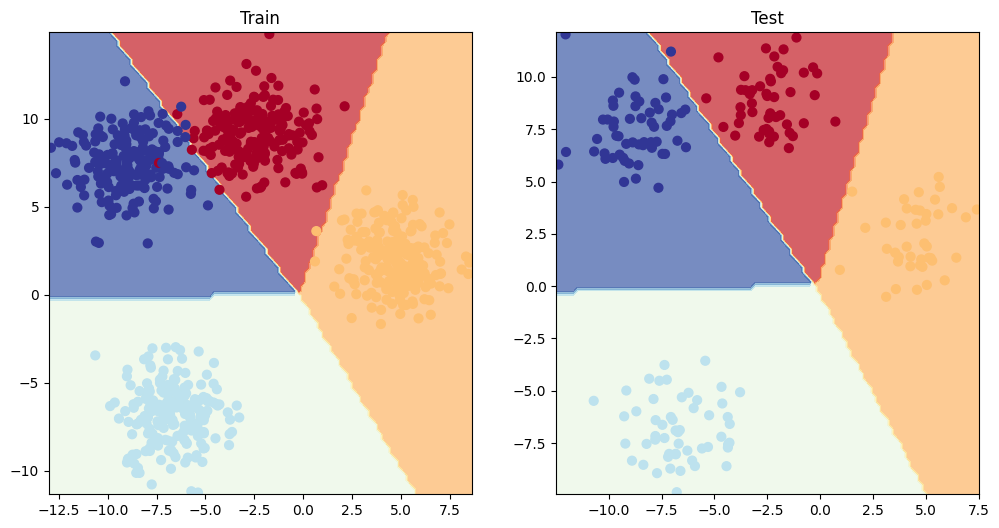

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(Model_MR, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(Model_MR, X_blob_test, y_blob_test)